##### Update drivers:

In [1]:
%%time
!apt update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [44.4 kB]
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [550 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu b

##### Install libraries:

In [2]:
%%time
!pip3 install fuzzy-pandas
!pip3 install webdriver_manager
!pip3 install arxiv
!pip3 install wikipedia-api
!pip3 install tika
!pip3 install pdfminer
!pip3 install spacy==2.1.0
!python3 -m spacy download en_core_web_lg
!pip3 install neuralcoref --no-binary neuralcoref
!pip3 install python-docx
!pip3 install sumy
!pip3 install yake
!pip3 install transformers
!pip3 install textstat
!pip3 install rouge
!pip3 install rouge-score
!pip3 install sentencepiece
!apt install chromium-chromedriver
!pip install googletrans==3.1.0a0
!pip install selenium
!pip install keybert

     |████████████████████████████████| 92kB 4.9MB/s 
     |████████████████████████████████| 143kB 15.6MB/s 
     |████████████████████████████████| 245kB 18.8MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 532kB 22.2MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 163kB 27.3MB/s 
     |████████████████████████████████| 3.0MB 32.1MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 102kB 8.0MB/s 
     |████████████████████████████████| 215kB 62.7MB/s 
     |████████████████████████████████| 798kB 43.6MB/s 
     |████████████████████████████████| 256kB 71.6MB/s 
     |████████████████████████████████| 245kB 60.0MB/s 
  Created wheel for jellyfish: filename=jellyfish-0.7.2-cp36-cp36m-linux_x86_64.whl size=72997 sha256=64eab2afa28e6038ee62d03685b2edbd609a43a21c7332f89050158a228b7b43
  St

##### Restart and import libraries:

In [1]:
# general
import time, random
from random import randint
#/general

# graph libraries
import matplotlib.pyplot as plt
#/graph libraries

# process arrays and dataframes
import pandas as pd
import numpy as np
import collections
import fuzzy_pandas as fpd
from collections import Counter
#/process arrays and dataframes

# parallel calculations
from tqdm import tqdm
#/parallel calculations

# web driver
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
#/web driver

# web parsing
from bs4 import BeautifulSoup
from bs4.element import Tag
from requests import get
#/web parsing

# parsing libs
import arxiv
import wikipediaapi
from googlesearch import search  
#/parsing libs

# read .pdf
from tika import parser
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
#/read .pdf

# text processing
import spacy, nltk, string, re
import neuralcoref
import networkx as nx
from spacy.symbols import nsubj, nsubjpass, VERB
from nltk.tokenize import sent_tokenize, word_tokenize
from more_itertools import unique_everseen
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import difflib
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, sent_tokenize

nlp = spacy.load('en_core_web_lg')
nlp.max_length = 50000000
#/text processing

# create .docx
import docx
from docx import Document
from docx.shared import Cm
from docx.shared import Pt
from docx.enum.dml import MSO_THEME_COLOR_INDEX
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.shared import Pt
#/create .docx

# keywords extraction
import yake
from keybert import KeyBERT
#/keywords extraction

# extractive summarizer
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
#/extractive summarizer

# abstractive summarizer
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from googletrans import Translator
import textstat
import torch
#/abstractive summarizer

# many-to-many evaluation
import textstat
from rouge import Rouge
from rouge_score import rouge_scorer
from difflib import SequenceMatcher
#/many-to-many evaluation

100%|██████████| 40155833/40155833 [00:02<00:00, 19574697.95B/s]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


##### Define language model:

In [2]:
spacy_nlp = spacy.load('en_core_web_lg', disable=["tagger","parser"])
model = KeyBERT('distilbert-base-nli-mean-tokens')

100%|██████████| 245M/245M [00:04<00:00, 50.4MB/s]


##### Parameters

In [3]:
UPLOAD_FOLDER = '/'

# tied threshold
threshold = 0.8

# autodefinition threshold
rouge_limit = 0.5

# parsing number of pages
page_number = 5

# search time lag
months_delta = 12

# paraphrase maximal length
max_length = 60

# reading time in minutes
reading_time = 5

##### Feature toggles

In [4]:
filter_request = False

paraphrase = True
translate = True

optimal_time = False
compress = True

wiki_sum = True
gogle_sum = True
arxiv_sum = True

##### Custom functions:

In [81]:
##### HTML parsing #####
def parse_google_page(url): 
    try:
        LANGUAGE = "english"
        title = BeautifulSoup(get(url).content, 'html.parser').title.getText()
        parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
        
        summarizer = Summarizer(Stemmer(LANGUAGE))
        summarizer.stop_words = get_stop_words(LANGUAGE)

        sentences = []
        for i in summarizer(parser.document, 1000000):
            sentences.append(str(i))
        txt = ' '.join(sentences)
    except:
        txt = ''
        title = ''
    
    return txt, title

def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

def get_unique_text(document):
    unique_sentences = []
    for sentence in [sent.raw for sent in TextBlob(document).sentences]:
        if sentence not in unique_sentences:
            unique_sentences.append(sentence)
    return ' '.join(unique_sentences)

def get_text(url):
    page = urlopen(url)
    soup = BeautifulSoup(page)
    fetched_text = ' '.join(map(lambda p:p.text,soup.find_all('p')))
    return fetched_text
#####/HTML parsing #####

############# Parse Wiki ############# 
def parse_wiki(google_url):
    
    # load driver
    driver = webdriver.Chrome(options=options)
    #/load driver
    
    # get urls  
    driver.get(google_url)
    time.sleep(randint(1,5))

    soup = BeautifulSoup(driver.page_source,'lxml')
    result_div = soup.find_all('div', attrs={'class': 'g'})

    links = []
    titles = []
    errors = []

    descriptions = []
    for r in result_div:
        try:
            link = r.find('a', href=True)
            title = None
            title = r.find('h3')

            if isinstance(title,Tag):
                title = title.get_text()

            description = None
            description = r.find('span', attrs={'class': 'st'})

            if isinstance(description, Tag):
                description = description.get_text()

            if link != '' and title != '' and description != '':
                links.append(link['href'])
                titles.append(title)
                descriptions.append(description)

        except Exception as e:
            print(e)
            continue

    url_list = links[:(page_number)]
    url_list = [i for i in url_list if 'https://en.wikipedia.org' in i]
    
    title_list = []
    for i in url_list:
        try:
            if 'https://en.wikipedia.org' in i: 
                title_list.append(i.split('/')[4])  
        except:
            continue
    #/ get urls
        
    driver.stop_client()
    driver.close()
    
    return title_list     
############# Parse Wiki ##############

############# Parse Arxiv #############
def parse_arxiv(query):
    
    arxivtext = ''  
    
    urls = []
    titles = []
  
    arxiv_data = arxiv.query(query=query, max_results=page_number)

    urls = [i['id'].replace('arxiv.org/', 'export.arxiv.org/') for i in arxiv_data]
    titles = [i['title'] for i in arxiv_data]
    abstracts = [i['summary'] for i in arxiv_data] 

    txts = []
    driver = webdriver.Chrome(options=options)

    for i in tqdm(urls):
    
        driver.get(i)
        soup = BeautifulSoup(driver.page_source,'lxml')
        result_div = soup.find_all('blockquote', attrs={'class': 'abstract mathjax'})[0]
        abstract = result_div.get_text().replace('\n',' ').replace('\t',' ').strip()

        file_data = parser.from_file(i.replace('abs', 'pdf'))['content']
        content = file_data.replace('\n',' ').replace('\t',' ').strip()

        extended_abstract = filter_text(content, abstract, threshold=0.01).replace('\n',' ').replace('\t',' ').strip()
        txts.append(extended_abstract)
    
    driver.stop_client()
    driver.close()

    arxivtext = re.sub('[^A-Za-z0-9.]+', ' ', '; '.join(txts))

    df = pd.DataFrame(list(zip(txts, urls, titles)), columns=['text','link', 'page'])
    
    return arxivtext, titles, df
#############/Parse Arxiv #############

############# Parse Google ###############
def parse_google(query):   
    
    txt = []
    titles = []
    errors = []

    # load driver
    driver = webdriver.Chrome(options=options)
    #/load driver  

    # get urls
    google_url = "https://www.google.com/search?q=" + query + "&num=" + str(page_number+1)
    
    if filter_request == True:
        google_url = google_url + '&searchtype=all&source=header&start=0&date-filter_by=past_' + str(months_delta)
        google_url = google_url + '&hl=en&gl=en' + '&lr=lang_en&cr=countryGB'
    
    driver.get(google_url)
    time.sleep(randint(1,5))

    soup = BeautifulSoup(driver.page_source,'lxml')
    result_div = soup.find_all('div', attrs={'class': 'g'})

    links = []
    titles = []
    errors = []

    descriptions = []
    for r in result_div:
        try:
            link = r.find('a', href=True)
            title = None
            title = r.find('h3')

            if isinstance(title,Tag):
                title = title.get_text()

            description = None
            description = r.find('span', attrs={'class': 'st'})

            if isinstance(description, Tag):
                description = description.get_text()
                
            wikiarxiv_filter = ('wikipedia.org' not in link['href']) and ('arxiv.org' not in link['href'])
            patent_filter = ('patents.google.com/' not in link['href'])

            if wikiarxiv_filter and patent_filter and link != '' and title != '' and description != '':
                links.append(link['href'])
                titles.append(title)
                descriptions.append(description)

        except Exception as e:
            print(e)
            continue

    url_list = list(set(links))[:(page_number)] 
    #/ get urls
    
    for j in tqdm(url_list):
        delta = random.randint(1,8)
        time.sleep(delta) 
        
        try:  
            if str(j).endswith('.pdf'):
                file_data = parser.from_file(str(j))        
                t = file_data['content'].replace('\n','')    
                titles.append(t[:100])
            else:
                t = parse_google_page(j)[0].replace('\n','') 
                titles.append(parse_google_page(j)[1].replace('\n',''))
            
            txt.append(t)
            
        except:
            print('Parsing error:',str(j))
            errors.append(str(j))
          
    df = pd.DataFrame(list(zip(txt, url_list, titles)), columns=['text','link', 'page'])
    df = df[~df['page'].str.contains('|'.join(['403','404']))]
    df.replace('', np.nan, inplace=True)
    df.dropna(inplace=True)
    
    googletext = re.sub('[^A-Za-z0-9.]+', ' ', '; '.join(list(df['text'])))
    titles = list(df['page'])
   
    return googletext, errors, df, titles
#############/Parse Google ###############

############## Text processing #########
def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)
    return u" ".join(t.strip() for t in visible_texts)

def text_normalize(txt):
    processed_text = re.sub('[^a-zA-Z]', ' ', txt)
    processed_text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",processed_text)
    processed_text=re.sub("(\\d|\\W)+"," ",processed_text)

    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(processed_text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if not word in stop_words]
    tokens = [i for i in tokens if (tags(i) in ['NN', 'NNP', 'NNS', 'NNPS'])]

    return tokens

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def filter_triplet(final_text):
    
    final_text = get_unique_text(final_text)
    doc = nlp(final_text)
    valid_sents = []

    for s in list(doc.sents):
        if syntax_full(s):
            valid_sents.append(s.text)
    
    final_text = ' '.join(valid_sents)
    
    return final_text

def coref_res(rawtext, coref_greedn = 0.5):

    neuralcoref.add_to_pipe(nlp, greedyness = coref_greedn, store_scores=False)
    doc = nlp(rawtext)

    resolved = list(tok.text_with_ws for tok in doc)

    for cluster in doc._.coref_clusters:
        for coref in cluster:
            if coref != cluster.main:
                if coref.text[0].isalpha() and coref.text[0].isupper():

                    main_words_list=word_tokenize(cluster.main.text)
                    main_words_list[0]=main_words_list[0].capitalize()
                    resolved[coref.start] = detokenizer(main_words_list) + doc[coref.end-1].whitespace_

                for i in range(coref.start+1, coref.end):
                    resolved[i] = ""
            else:
                resolved[coref.start] = cluster.main.text + doc[coref.end-1].whitespace_
                for i in range(coref.start+1, coref.end):
                    resolved[i] = ""

    text_resolved = ''.join(resolved)
    nlp.remove_pipe("neuralcoref")

    return text_resolved

def compress(spacy_sents,sents_whitelist):
    blacklist_tokens=[]
    n=1
    for sent in spacy_sents:
        if (n in sents_whitelist):
            for token in sent:
                if token.dep_ in ['appos','advmod']:
                    token_sub_tree=token.subtree
                    for t in token_sub_tree:
                        blacklist_tokens.append(t.i)

        n=n+1
    return(blacklist_tokens)

def spacy_compress(rawtext):

    doc1 = nlp(rawtext)
    sents_whitelist = get_sents_ids_whitelist(doc1.sents)

    tokens_blacklist = compress(doc1.sents,sents_whitelist)
    sents_tokens = get_list_sents_tokens(doc1.sents,sents_whitelist,tokens_blacklist)
    compressed_text_sents = []

    for s in sents_tokens:
        text=detokenizer(s)
        compressed_text_sents.append(text)
    compressed_text_sents=sentence_grammar_fix(compressed_text_sents)
    text =' '.join(compressed_text_sents)

    return(text)
##### Text processing #####

############## Get summary #############
def get_summary(rawtext, sentences):
    
    stemmer = Stemmer("english")
    summarizer = Summarizer(stemmer)
    summarizer.stop_words = get_stop_words("english")
    parser = PlaintextParser.from_string(' '.join(sent_tokenize(rawtext)[6:]), Tokenizer("english"))

    text_list = []
    for sentence in summarizer(parser.document, sentences):
        text_list.append(str(sentence))

    txt = ' '.join(sent_tokenize(rawtext)[:6]) + ' '+' '.join(text_list)

    z = 0
    output = []
    
    for i in nltk.sent_tokenize(txt):
        output.append(str(i) + '==')
    
    txt = ''.join(output)
    
    return txt
##############/Get summary #############

############## Get tags and entities ###########
def graph_keys(final_text, top_number):
    
    bigrams = list(nltk.ngrams(text_normalize(final_text.lower()),2))
    bigrams = [' '.join(i) for i in bigrams if (i[0]!=i[1])] 
    bigram_counts = collections.Counter(bigrams)
    
    df = pd.DataFrame(bigram_counts.most_common(len(bigram_counts)), columns=['bigram', 'count'])[:top_number]
    df['count'] = 100*df['count']/df['count'].sum().astype(int) 
    keys = ', '.join(list(df['bigram'].astype(str)))

    return keys

def yake_keys(text, keys_number):
    сustom_kw_extractor = yake.KeywordExtractor(lan="en", n=2, top=keys_number)
    keywords = сustom_kw_extractor.extract_keywords(text)
    keywords = ', '.join([i[1] for i in keywords])
    
    return keywords

def get_entities(rawtext, tops):
    spacy_nlp = spacy.load('en_core_web_lg', disable=["tagger","parser"])
    nlp.max_length = 1000000000000
    doc = spacy_nlp(rawtext)

    ners = []
    for ent in doc.ents:
        if ent.label_ in ['ORG', 'PERSON']:
            ners.append(ent.text)
   
    ner_counts = collections.Counter(ners)

    try:
        df = pd.DataFrame(ner_counts.most_common(len(ner_counts)), columns=['ner_names', 'count'])[:tops]
        df['count'] = 100*df['count']/df['count'].sum().astype(int) 
        keys = ', '.join(list(df['ner_names'].astype(str)))
    except:
        keys = ''
    
    return keys
############## Get tags and entities #############

############## Add keyurls ################
def add_keyurls(final_keys, query):
    url_keys = []
    for i in final_keys.split(','):
        url = 'https://www.google.com/search?q=' + '+'.join(re.sub(r" ?\([^)]+\)", "", i).strip().split()) + '+' + query + '/keyword/' + i 
        url_keys.append(url)
        
    return url_keys     
##############/Add urls ###################

##### Abstractive summarization #############
def get_response(input_text,num_return_sequences):
    
    batch = tokenizer.prepare_seq2seq_batch([input_text], truncation=True, padding='longest', max_length=60, return_tensors="pt").to(torch_device)
    translated = model.generate(**batch, max_length=60, num_beams=10, num_return_sequences=num_return_sequences, temperature=1.5)
    
    tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
    
    return tgt_text
#####/Abstractive summarization #############

############# Doc preparation ##########
def add_hyperlink(paragraph, text, url, flag):
    part = paragraph.part
    r_id = part.relate_to(url, docx.opc.constants.RELATIONSHIP_TYPE.HYPERLINK, is_external=True)

    # Create the w:hyperlink tag and add needed values
    hyperlink = docx.oxml.shared.OxmlElement('w:hyperlink')
    hyperlink.set(docx.oxml.shared.qn('r:id'), r_id, )

    # Create a w:r element and a new w:rPr element
    new_run = docx.oxml.shared.OxmlElement('w:r')
    rPr = docx.oxml.shared.OxmlElement('w:rPr')

    # Join all the xml elements together add add the required text to the w:r element
    new_run.append(rPr)
    new_run.text = text
    hyperlink.append(new_run)

    # Create a new Run object and add the hyperlink into it
    r = paragraph.add_run()
    r._r.append (hyperlink) 

    # A workaround for the lack of a hyperlink style (doesn't go purple after using the link)
    # Delete this if using a template that has the hyperlink style in it
    r.font.color.theme_color = MSO_THEME_COLOR_INDEX.HYPERLINK
    r.font.underline = flag

    return hyperlink

def save_doc(final_summary, summary, query, score, compression, ners, keys):
    
    sent_list = list(final_summary.split(sep='<hr>'))
    doc = Document()
    style = doc.styles['Normal']
    
    font = style.font
    font.name = 'Times New Roman'
    font.size = Pt(12)

    hd = doc.add_paragraph()
    hd.alignment = WD_ALIGN_PARAGRAPH.JUSTIFY
    hd.add_run('Summary').bold = True

    if query != 'none':
        hd = doc.add_paragraph('Request: ' + "''" + query + "''")

    hd = doc.add_paragraph('Information: ' + str(score))
    hd = doc.add_paragraph('Word compression: ' + str(compression))
    hd = doc.add_paragraph('Model efficiency: ' + str(round((score/compression), 2)))
    hd = doc.add_paragraph('Tags: ' + ners + ', ' + keys)
    doc.add_picture('graph.png', width=Inches(1), height=Inches(1))
    
    r = hd.add_run()
    for i in sent_list:
        hd.alignment = WD_ALIGN_PARAGRAPH.JUSTIFY

        if query != 'none':
            try:
                link = re.search(r"<a href=(.*?)target='_blank'", str(i)).group(1).replace(' ','')
                hd = doc.add_paragraph(striphtml(str(i)).replace('<hr>','').replace('<u>','').replace('More',''))               
                add_hyperlink(hd, 'More', link, True).add_run()
            except:
                link = ''
        if query == 'none':
            hd = doc.add_paragraph(striphtml(str(i)).replace('<hr>','').replace('<u>','').replace('More',''))    
         
    doc.save(UPLOAD_FOLDER + summary + '.docx')
    
    return True
#############/Doc preparation ##########

############## Sandbox functions ##########
def longest_common_substring(s1, s2):
  m = [[0] * (1 + len(s2)) for i in range(1 + len(s1))]
  longest, x_longest = 0, 0
  for x in range(1, 1 + len(s1)):
    for y in range(1, 1 + len(s2)):
      if s1[x - 1] == s2[y - 1]:
        m[x][y] = m[x - 1][y - 1] + 1
        if m[x][y] > longest:
          longest = m[x][y]
          x_longest = x
      else:
        m[x][y] = 0
  return s1[x_longest - longest: x_longest]

def longest_common_sentence(s1, s2):
    s1_words = s1.split(' ')
    s2_words = s2.split(' ')
    return ' '.join(longest_common_substring(s1_words, s2_words))

def css(a,b):
    if len(a.split()) > 0:
        score = len(longest_common_sentence(a,b).split())/len(a.split())
    else:    
        score = 0
    return score

def readingTime(mytext):
    total_words = len(word_tokenize(mytext))
    estimatedTime = round(total_words/200.0,1)
    return estimatedTime

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

def tags(x):
    return nltk.pos_tag(nltk.word_tokenize(x))[0][1]

def syntax_full(spacy_sentence):
    result=[]
    for token in spacy_sentence:
        if (token.dep == nsubj or token.dep == nsubjpass) and token.head.pos == VERB:
            result.append(token.head)
    if result:
        return True
    else:
        return False

def check_min_num_of_clauses(spacy_sentence, n):
    result=[]
    for token in spacy_sentence:
        if (token.dep_ in ['nsubj','nsubjpass','csubj','expl']) and (token.head.pos_ == 'VERB' or token.head.pos_ == 'AUX'):
            result.append(token.head.text)
    if len(result)>=n:
        return True

    else:
        return False

def get_sents_ids_whitelist(spacy_sents):
    whitelist=[]
    i=1
    sents_texts=[]
    for sent in spacy_sents:
        if (sent.text not in sents_texts) and check_min_num_of_clauses(sent,1):
            whitelist.append(i)
            sents_texts.append(sent.text)
        i=i+1
    return(whitelist)

def get_list_sents_tokens(spacy_sents,sents_whitelist,blacklist_tokens):
    sents_tokens=[]
    n=1
    for sent in spacy_sents:
        sent_tokens=[]
        if (n in sents_whitelist):
            for token in sent:
                if (token.i not in blacklist_tokens):
                    sent_tokens.append(token.text)
            sents_tokens.append(sent_tokens)
            sent_tokens=[]

        n=n+1
    return(sents_tokens)

def detokenizer(list_of_tokens):
    text_str="".join([" "+w if not w.startswith("'") and not w.startswith("’") and w!='' and w not in string.punctuation else w for w in list_of_tokens]).strip()
    return(text_str)

def sentence_grammar_fix(sentences):
    fixed=[]
    for sent in sentences:

        sent=sent.strip()
        sent=sent.replace('\n','')
        sent=sent.replace('()','')

        sent=re.sub('\s+',' ',sent)
        sent=sent+'.'
        sent=re.sub(r'([,.\-—:])+',r'\1',sent)

        if len(sent)>1:
            if sent[0] in ['.',',','-','—']:
                sent=sent[1:]
        sent=sent.strip()

        if len(sent)>1:
            if sent[0].isalpha():
                sent=sent[0].upper()+sent[1:]
        fixed.append(sent)

    return(fixed)

def get_scores(report_summary, final_text):
    scorer = rouge_scorer.RougeScorer(['rouge2'], use_stemmer=True)
    scores = scorer.score(' '.join(text_normalize(report_summary)).lower(), ' '.join(text_normalize(final_text)).lower())
    scores = round(list(list(scores.values())[0])[2],2)
    
    return scores 
##############/Sandbox functions ##########

############## Extend abstract ##########
def get_ngrams(text): 
    grams = nltk.ngrams(text.split(), 2)
    grams_list = []
    for i in grams:
        grams_list.append(i)
    
    return grams_list 

def get_jaccard_sim(a,b):
    a, b = set(get_ngrams(a)), set(get_ngrams(b)) 
    c = a.intersection(b)

    return round(float(len(c)/len(a)), 2)

def filter_text(content, abstract, threshold=0.5, content_type='arxiv'): 
    
    content_list = []   
    
    for j in content.split('.'):
        try:
            sim_score = get_jaccard_sim(j, abstract)
        except:
            sim_score = 0
            
        if sim_score > threshold:
            content_list.append(j)    
        
        if content_type == 'wiki':
            reduced_list = [i for i in content_list if i not in list(abstract.split('.'))]
            final_list = list(dict.fromkeys(abstract.split('.') + reduced_list)) 
        else:
            final_list = content_list 
                        
    return '. '.join(final_list)
##############/Extend abstract #########

############## Graphs ##################
def create_graph(text, nodes=20, common=500, iterations=500):
    
    tokens = text_normalize(text)
    
    ## create bigrams
    bigrams=list(nltk.ngrams(tokens, 2))
    bigram_counts = collections.Counter(bigrams)

    bigram_df = pd.DataFrame(bigram_counts.most_common(common), columns=['bigram', 'count'])
    d = bigram_df.set_index('bigram').T.to_dict('records')
    ##/create bigrams

    ## create graph
    G = nx.Graph()
    for k, v in d[0].items():
            G.add_edge(k[0], k[1], weight=(v*10))
    ## /create graph

    ## remove isolates
    G.remove_nodes_from(list(nx.isolates(G)))
    ## /remove isolates

    ## filter graph by degree
    threshold = int(G.number_of_nodes()*(max(nx.degree_centrality(G).values())))

    for i in range(0, threshold):
        F = nx.Graph() 
        fedges = filter(lambda x: G.degree()[x[0]] > 0 and G.degree()[x[1]] > i, G.edges())
        F.add_edges_from(fedges)
        F.remove_nodes_from(list(nx.isolates(F)))

        if F.number_of_nodes() < nodes:
            break
    ## /filter graph by degree

    ## create tree
    pos = nx.spring_layout(F, iterations=iterations)
    ##/create tree

    return F, pos
    
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c) 
##############/Graphs ##################

############## Metrics #################
def readability_ratio(x,y):
  
  x = textstat.syllable_count(x)
  y = textstat.syllable_count(y)
  
  return(round(y/x,2))
##############/Metrics #################

##### Query

In [6]:
query = input()

smart glass


##### Parse Wiki:

In [7]:
%%time

wikitext = ''
wikikeys = ''

df_wiki = pd.DataFrame()

if wiki_sum == True: 
    
    wiki_wiki = wikipediaapi.Wikipedia('en', extract_format=wikipediaapi.ExtractFormat.WIKI)
    
    red_query = "https://www.google.com/search?q=" + 'site:https://en.wikipedia.org ' + query + "&num=" + str(page_number+1)
    red_query = red_query + '&searchtype=all&source=header'
    
    wiki_titles = parse_wiki(red_query)

    txts = []
    titles = []

    for i in tqdm(wiki_titles): 
        
        page_sum = wiki_wiki.page(i).summary
        page_txt = wiki_wiki.page(i).text
        sent_list = filter_text(page_txt, page_sum, threshold=threshold, content_type='wiki')
       
        titles.append(i)
        txts.append(''.join(sent_list).replace('\n', ''))        
    
    wikitext = ''.join(txts).replace('\n','') 

    if compress == True:
        wikitext = coref_res(filter_triplet(wikitext))

    url_list = [str('https://en.wikipedia.org/wiki/' + i)  for i in wiki_titles] 
    
    df_wiki = pd.DataFrame(list(zip(txts, url_list, titles)), columns=['text','link', 'page'])
    df_wiki.replace('', np.nan, inplace=True)
    df_wiki.dropna(inplace=True)
    
    random_num = randint(1,len(df_wiki))  
    
    print(df_wiki['page'][random_num-1]+'\n')
    print(df_wiki['text'][random_num-1][:1000]+'...'+'\n')  

100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

Smartglasses

Smartglasses or smart glasses are wearable computer glasses that add information alongside or to what the wearer sees.  Alternatively, smartglasses are sometimes defined as wearable computer glasses that are able to change their optical properties at runtime.  Smart sunglasses which are programmed to change tint by electronic means are an example of the latter type of smartglasses. Superimposing information onto a field of view is achieved through an optical head-mounted display (OHMD) or embedded wireless glasses with transparent heads-up display (HUD) or augmented reality (AR) overlay.  These systems have the capability to reflect projected digital images as well as allow the user to see through it or see better with it.  While early models can perform basic tasks, such as serving as a front end display for a remote system, as in the case of smartglasses utilizing cellular technology or Wi-Fi, modern smart glasses are effectively wearable computers which can run self-co

##### Parse Arxiv:

In [8]:
%%time

arxivtext = ''
arxivkeys = ''

df_arxiv = pd.DataFrame()

if arxiv_sum == True:
    
    try:
        df_arxiv = parse_arxiv(query)[2] 
        df_arxiv.replace('', np.nan, inplace=True)
        df_arxiv.dropna(inplace=True)   
        
        arxivtext = ''.join(list(df_arxiv['text'])) 
    
        if compress == True:
            arxivtext = coref_res(filter_triplet(arxivtext))
    
        random_num = randint(1, len(df_arxiv)) 
        
        print(df_arxiv['page'][random_num-1]+'\n')
        print(df_arxiv['text'][random_num-1][:1000]+'...'+'\n')
    
    except:
        print('No data')

  0%|          | 0/5 [00:00<?, ?it/s]2021-02-02 11:09:53,987 [MainThread  ] [INFO ]  Retrieving http://export.arxiv.org/pdf/1905.05810v1 to /tmp/pdf-1905.05810v1.
2021-02-02 11:09:57,017 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2021-02-02 11:09:57,708 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2021-02-02 11:09:58,456 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:613: DeprecationWarning: generator 'ngrams' raised StopIteration
100%|██████████| 5/5 [00:50<00:00, 10.10s/it]

Interaction Methods for Smart Glasses

Interaction Methods for Smart Glasses   1  Interaction Methods for Smart Glasses  LIK-HANG, LEE and PAN, HUI, The Hong Kong University of Science and Technology  Since the launch of Google Glass in 2014, smart glasses havemainly been designed to supportmicro-interactions.  The ultimate goal for them to become an augmented reality interface has not yet been attained due to an encumbrance of controls.  Augmented reality involves superimposing interactive computer graphics images onto physical objects in the real world.  This survey reviews current research issues in the area of human- computer interaction for smart glasses.  The survey first studies the smart glasses available in the market and afterwards investigates the interaction methods proposed in the wide body of literature.  The interaction methods can be classified into hand-held, touch, and touchless input.  This paper mainly focuses on the touch and touchless input.  Touch input can be fu

##### Parse Google:

In [9]:
%%time

googletext = ''
df_google = pd.DataFrame()

if gogle_sum == True:
    
    try:
        df_google = parse_google(query)[2]
        df_google.replace('', np.nan, inplace=True)
        
        googletext = ''.join(list(df_google['text']))
        
        if compress == True:
            googletext = coref_res(filter_triplet(googletext))
            
        random_num = randint(1,len(df_google)) 
        
        print(list(df_google['page'])[random_num-1]+'\n')
        print(list(df_google['text'])[random_num-1])

    except:
        print('No data')   

100%|██████████| 5/5 [00:33<00:00,  6.77s/it]

Smart Glass for windows & Doors | Aluminium Trade Supply

Smar glass and Smart film in office Switchable glass technology makes a beautiful, affordable addition to any home or office. The streamlined, modern appearance achieved with smart glass products is obviously desirable, so naturally one of the first questions people ask is ‘How much does it cost?’ The cost of switchable glass and film products depends on which product you are interested in, the dimensions, total square footage of the order and any special specifications. While smart film and glass are more expensive than ordinary glass, it eliminates the need to purchase blinds or curtains for privacy and can even decrease energy and cleaning costs. The cost of our standard switchable glass ranges from $85-130 United States Dollars (USD) per square foot. For orders under 40 square feet, you can expect to pay $130 USD per square foot. As the quantity increases, the price decreases. We may be able to negotiate the price lower than

##### Concatenate dataframes:

In [10]:
df = df_wiki.append(df_google).append(df_arxiv)
df.head()

,text,link,page
0,Smart glass or switchable glass (also smart wi...,https://en.wikipedia.org/wiki/Smart_glass,Smart_glass
1,Smartglasses or smart glasses are wearable com...,https://en.wikipedia.org/wiki/Smartglasses,Smartglasses
0,Smart Glass is an innovative building material...,https://www.smartglassinternational.com/smart-...,Wearable Technology - Smart Glasses - Optiscan
1,Wouldn't it be great to simply switch glass fr...,https://www.smartglasscountry.com/,Wearable Technology - Smart Glasses - Optiscan
2,Technology in glass is already quite sophistic...,https://www.aluminiumtradesupply.co.uk/12549/w...,What is Smart Glass? - SmartGlass International


##### Define optimal compression rate:

In [11]:
%%time
final_text = (wikitext + arxivtext + googletext)

if optimal_time == True:

  for i in tqdm(range(50, 10000, 20)): 
    
    report_summary = get_summary(final_text, i)
    scores = get_scores(report_summary, final_text)
    
    print('Volume:', i)
    print('Score:', scores, '\n')
    
    if scores > rouge_limit:
        print('Optimal volume:', i, 'sentences', '\n')
        sent_number = i
        break

CPU times: user 0 ns, sys: 311 µs, total: 311 µs
Wall time: 161 µs


##### Reading time number of sentences:

In [12]:
if optimal_time == False:
  
  final_text = (wikitext + arxivtext + googletext)

  for i in tqdm(range(0, len(sent_tokenize(final_text)))):
    
    current_time = len(word_tokenize('. '.join(sent_tokenize(final_text)[:i])))/250
    if current_time > reading_time: 
      sent_number = (i-1)   
      break

  print('\n\nOptimal number of sentences:', sent_number)

  5%|▍         | 52/1083 [00:02<00:58, 17.56it/s]



Optimal number of sentences: 51


##### Extractive summary:

In [13]:
%%time
report_summary = get_summary(final_text, sent_number)

CPU times: user 7.59 s, sys: 457 ms, total: 8.04 s
Wall time: 6.8 s


##### Summary metrics:

In [60]:
compression = round(len(word_tokenize(report_summary))/len(word_tokenize(final_text)),2) 
scores = get_scores(report_summary, final_text)

print('Bigrams extracted:', str(scores))
print('\nCompression:', compression)
print('\nEfficiency:', str(round((scores/compression),2)), '\n')  

print((report_summary[:1000])+'...', '\n')

Bigrams extracted: 0.13

Compression: 0.07

Efficiency: 1.86 

Smart glass or switchable glass (also smart windows or switchable windows in those applications) is a glass or glazing whose light transmission properties are altered when voltage, light, or heat is applied.==In general, the glass changes from transparent to translucent and vice versa, changing from letting light pass through to blocking some (or all) wavelengths of light and vice versa.==Smart glass technologies include electrochromic, photochromic, thermochromic, suspended-particle, micro-blind, and polymer-dispersed liquid-crystal devices.==When installed in the envelope of buildings, smart glass creates climate adaptive building shells.==Smartglasses or smart glasses are wearable computer glasses that add information alongside or to what the wearer sees.==Alternatively, smartglasses are sometimes defined as wearable computer glasses that are able to change their optical properties at runtime.==While early models can per

##### Extract entities:

In [14]:
%%time

ner_list = []
doc = spacy_nlp(final_text)

for ent in tqdm(doc.ents):
    if ent.label_ in ['ORG', 'PERSON']:
        ner_list.append(ent.text)
        
ners = dict(Counter(ner_list))
ners_seld = [i[0] for i in sorted(ners.items(), key=lambda x: x[1], reverse=False)][:10]
ners_freq = [i[0] for i in sorted(ners.items(), key=lambda x: x[1], reverse=True)][:10]

ners = ', '.join(ners_freq + ners_seld) 

print('\n\nNERs:', ners, '\n')

100%|██████████| 1086/1086 [00:00<00:00, 139237.46it/s]



NERs: Glass, AHM, ACM Computing Surveys, WasteNet, Google Glass, RHM, SmartGlass International, OHMD, Android, AFH, HUD, Wi-Fi, Belkacema, Isabelle Peccia, Benoît Martina, Université de Lorraine, The Tactile Surface and Absolute Head Movement, ISO, Healthcare, Dr Bob 

CPU times: user 10.4 s, sys: 176 ms, total: 10.5 s
Wall time: 10.8 s


##### Define tags:

In [15]:
%%time
keywords = model.extract_keywords(final_text, keyphrase_ngram_range=(1,2), stop_words='english', use_maxsum=True, nr_candidates=20, top_n=10)
keys = ', '.join(keywords)

print('\nKeywords:', keys, '\n')


Keywords: nanofiber glass, glass potential, glass technologies, glass switchable, smartglass blocks, smart windows, electrochromic glass, manufactured smartglass, smartglasses superimposing, smartwatches glassgesture 

CPU times: user 8min 54s, sys: 16.7 s, total: 9min 10s
Wall time: 9min 14s


##### Create graph:

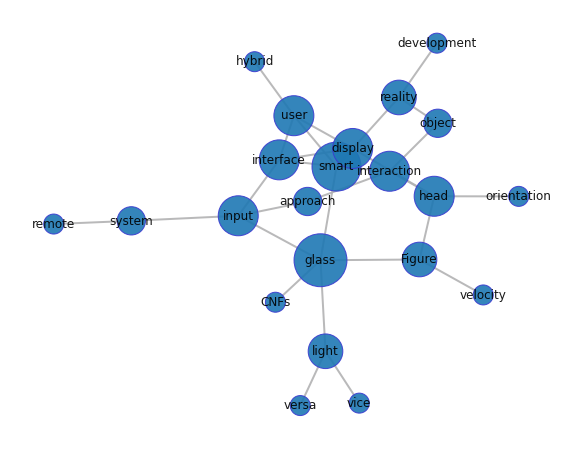

In [89]:
F,pos = create_graph(report_summary, 30, 1000)
d = dict(F.degree)
fig = plt.figure(figsize=(10,8))

nx.draw_networkx(F, font_size=12, width=2, alpha=0.9, with_labels = True, edgecolors='#3A3AD1', node_size=[v * 400 for v in d.values()], font_color='black', arrows=True, edge_color='#B2B2B3')

plt.margins(0.1)
plt.axis('off')
plt.show()

fig.savefig('graph', facecolor='white', edgecolor='none')

##### Paraphrase generation:

In [17]:
%%time

summ_list = []
if paraphrase == True:

    model_name = 'tuner007/pegasus_paraphrase'
    torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
    tokenizer = PegasusTokenizer.from_pretrained(model_name)
    model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)

    for i in tqdm(report_summary.split('==')[:-1]):
        summ_list.append('=='+ get_response(i,1)[0])
    
    restyled_summary = ' '.join(summ_list)

summ_list = []
if translate == True:
  translator = Translator()

  for i in tqdm(restyled_summary.split('==')[:-1]):
    ru_text = translator.translate(translator.translate(i, dest='de').text, dest='ru').text
    en_text = translator.translate(ru_text, dest='en').text
    summ_list.append('=='+ en_text)
    
  restyled_summary = ' '.join(summ_list)

print('\n\nROUGE score:', get_scores(restyled_summary, report_summary))
print('Complexity score:', readability_ratio(report_summary, restyled_summary))
print('Plaugarism:', round(SequenceMatcher(None, report_summary, restyled_summary).ratio(), 2), '\n')

Downloading:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

100%|██████████| 56/56 [00:32<00:00,  1.74it/s]




ROUGE score: 0.42
Complexity score: 0.69
Plaugarism: 0.12 

CPU times: user 31min 24s, sys: 20.2 s, total: 31min 44s
Wall time: 32min 57s


##### Create keys with urls:

In [18]:
%%time

ref_list = []
pdf_list = []
tlt_list = []

sent_list = list(report_summary.split(sep='=='))[:-1]

for i in sent_list:
    try:
        df_score = df.copy()
        df_score['score'] = df_score['text'].apply(lambda x: css(i,x))
        df_score = df_score.sort_values(by=['score'], ascending=False)
        
        if str(df_score['link'].iloc[0]):
            pdf_list.append(str(i))
            tlt_list.append(str(df_score['page'].iloc[0]))
            ref_list.append(str(df_score['link'].iloc[0]))
    except:
        pdf_list.append('')

pdf_summary = ''.join(pdf_list)

CPU times: user 7.16 s, sys: 12 ms, total: 7.18 s
Wall time: 7.23 s


##### Create dataframe from tags, titles and urls:

In [19]:
%%time

df_merged = pd.DataFrame(list(zip(ref_list, tlt_list, pdf_list)), columns=['link', 'title', 'text'])
df_grouped = df_merged[['link', 'text']].sort_index(ascending=True).groupby('link', as_index=True).agg(lambda x: ' '.join(x))
df_grouped = df_grouped.reindex(list(unique_everseen(ref_list))).reset_index()

df_grouped.columns = ['link', 'grouped_text']
df_final = pd.merge(df_grouped, df_merged[['link','title']].drop_duplicates(keep='first'), how='inner', on=['link'])[['link','title','grouped_text']]
print(df_final[:5], '\n')

                                         link  ...                                       grouped_text
0   https://en.wikipedia.org/wiki/Smart_glass  ...  Smart glass or switchable glass (also smart wi...
1  https://en.wikipedia.org/wiki/Smartglasses  ...  Smartglasses or smart glasses are wearable com...
2    http://export.arxiv.org/abs/1905.05810v1  ...  With a constant delivery of information  close...
3    http://export.arxiv.org/abs/1606.01479v1  ...  Short range networks of wearables for safer mo...
4    http://export.arxiv.org/abs/1707.09728v1  ...  Additionally, compared with smartphones, smart...

[5 rows x 3 columns] 

CPU times: user 41.1 ms, sys: 1.92 ms, total: 43 ms
Wall time: 105 ms


##### Add new titles and sources:

In [20]:
%%time

pdf_list = []
trc = 0

for i in range(len(df_final)):
    trc = trc + 1
    pdf_list.append(str(trc) + '. ...' + str(str(df_final['title'].iloc[i])) + '. ' + str(str(df_final['grouped_text'].iloc[i])) + " <u><a href=" + str(df_final['link'].iloc[i]) + " target='_blank'>" + "More" + "</a></u>" + "<hr>")

pdf_summary = ''.join(pdf_list)

CPU times: user 693 µs, sys: 0 ns, total: 693 µs
Wall time: 673 µs


In [93]:
def save_doc(final_summary, summary, query, score, compression, ners, keys):
    
    sent_list = list(final_summary.split(sep='<hr>'))
    doc = Document()
    style = doc.styles['Normal']
    
    font = style.font
    font.name = 'Times New Roman'
    font.size = Pt(12)

    hd = doc.add_paragraph()
    hd.alignment = WD_ALIGN_PARAGRAPH.JUSTIFY
    hd.add_run('Summary').bold = True

    if query != 'none':
        hd = doc.add_paragraph('Request: ' + "''" + query + "''")

    hd = doc.add_paragraph('Information: ' + str(score))
    hd = doc.add_paragraph('Word compression: ' + str(compression))
    hd = doc.add_paragraph('Model efficiency: ' + str(round((score/compression), 2)))
    hd = doc.add_paragraph('Tags: ' + ners + ', ' + keys)
    doc.add_picture('graph.png', width=Inches(6), height=Inches(5))
    
    r = hd.add_run()
    for i in sent_list:
        hd.alignment = WD_ALIGN_PARAGRAPH.JUSTIFY

        if query != 'none':
            try:
                link = re.search(r"<a href=(.*?)target='_blank'", str(i)).group(1).replace(' ','')
                hd = doc.add_paragraph(striphtml(str(i)).replace('<hr>','').replace('<u>','').replace('More',''))               
                add_hyperlink(hd, 'More', link, True).add_run()
            except:
                link = ''
        if query == 'none':
            hd = doc.add_paragraph(striphtml(str(i)).replace('<hr>','').replace('<u>','').replace('More',''))    
         
    doc.save(UPLOAD_FOLDER + summary + '.docx')
    
    return True

##### Save docx:

In [94]:
from docx.shared import Inches
save_doc(pdf_summary, '/content/summary', query, scores, compression, ners, keys)

True